<a href="https://colab.research.google.com/github/Syd-B/Product_Sales_Analysis_With_Python/blob/main/Product_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Visualization
import seaborn as sns

In [ ]:
pd.read_csv?

In [ ]:
#Importing the dataset
df = pd.read_csv('/content/drive/MyDrive/Product_Sales_Analysis_With_Python-main/Product_Sales_Analysis_With_Python-main/Product_Analysis/electronics.csv')

df.head()

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split
0,0,0,5.0,1999-06-13,Female,Portable Audio & Video,NaN,1999,NaN,0
1,0,1,5.0,1999-06-14,Female,Portable Audio & Video,NaN,1999,NaN,0
2,0,2,3.0,1999-06-17,Female,Portable Audio & Video,NaN,1999,NaN,0
3,0,3,1.0,1999-07-01,Female,Portable Audio & Video,NaN,1999,NaN,0
4,0,4,2.0,1999-07-06,Female,Portable Audio & Video,NaN,1999,NaN,0


In [ ]:
df.tail()

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split
1292949,9478,1157628,1.0,2018-09-26,Female,Headphones,Etre Jeune,2017,NaN,0
1292950,9435,1157629,5.0,2018-09-26,Female,Computers & Accessories,NaN,2017,NaN,0
1292951,9305,1157630,3.0,2018-09-26,Female,Computers & Accessories,NaN,2016,NaN,0
1292952,9303,1157631,5.0,2018-09-29,Male,Headphones,NaN,2018,NaN,0
1292953,9478,1157632,1.0,2018-10-01,Female,Headphones,Etre Jeune,2017,Female,0


In [ ]:
df.dropna(subset=['brand'], how='all', inplace=True)

In [ ]:
#shape
df.shape

(331120, 10)

In [ ]:
#All info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331120 entries, 14 to 1292953
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   item_id     331120 non-null  int64  
 1   user_id     331120 non-null  int64  
 2   rating      331120 non-null  float64
 3   timestamp   331120 non-null  object 
 4   model_attr  331120 non-null  object 
 5   category    331120 non-null  object 
 6   brand       331120 non-null  object 
 7   year        331120 non-null  int64  
 8   user_attr   45166 non-null   object 
 9   split       331120 non-null  int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 27.8+ MB


In [ ]:
from datetime import datetime
pd.to_datetime(df['timestamp'])

14        1999-10-17
42        1999-12-13
75        2000-03-22
76        2000-03-23
77        2000-03-25
             ...    
1292934   2018-09-21
1292942   2018-09-24
1292945   2018-09-25
1292949   2018-09-26
1292953   2018-10-01
Name: timestamp, Length: 331120, dtype: datetime64[ns]

In [ ]:
#Converting 'object' datatype to appropriate datatypes

#brand to string
df['brand'] = df['brand'].astype(str)

In [ ]:
#category to string
df['category'] = df['category'].astype(str)

In [ ]:
#rating to float
df['rating'] = df['rating'].astype(float)

In [ ]:
#item_id to string
df['item_id'] = df['item_id'].astype(str)

In [ ]:
df.describe()

,user_id,rating,year,split
count,3.311200e+05,331120.000000,331120.000000,331120.000000
mean,5.094713e+05,4.052428,2011.944301,0.168111
std,3.520852e+05,1.367006,3.172249,0.540578
min,1.400000e+01,1.000000,2000.000000,0.000000
25%,1.908870e+05,4.000000,2010.000000,0.000000
50%,4.736845e+05,5.000000,2013.000000,0.000000
75%,8.183392e+05,5.000000,2014.000000,0.000000
max,1.157632e+06,5.000000,2018.000000,2.000000


In [ ]:
df.nunique()

item_id         2207
user_id       316699
rating             5
timestamp       6108
model_attr         3
category          10
brand             50
year              19
user_attr          2
split              3
dtype: int64

In [ ]:
df.drop(df[df.brand == 'nan'].index, inplace=True)

In [ ]:
#drop all null and duplicate values
df.rating.dropna(inplace=True)

df.rating.drop_duplicates(inplace=True)

In [ ]:
#check for duplicates
df.duplicated().sum()

0

In [ ]:
#check for missing values
df.isnull().sum()

item_id            0
user_id            0
rating             0
timestamp          0
model_attr         0
category           0
brand              0
year               0
user_attr     285954
split              0
dtype: int64

#Visualizing Data

<Axes: xlabel='rating', ylabel='count'>

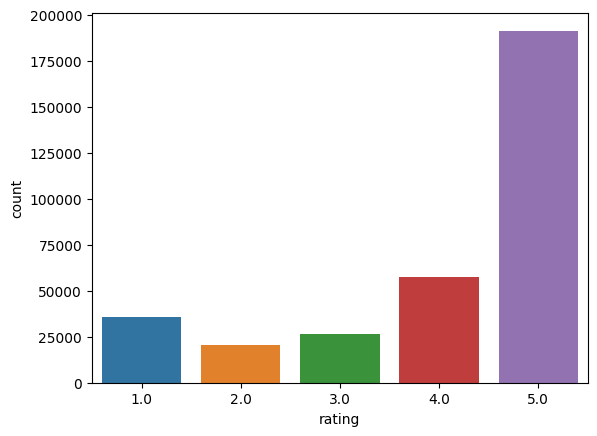

In [ ]:
sns.countplot(x='rating',data=df)

<Axes: xlabel='year'>

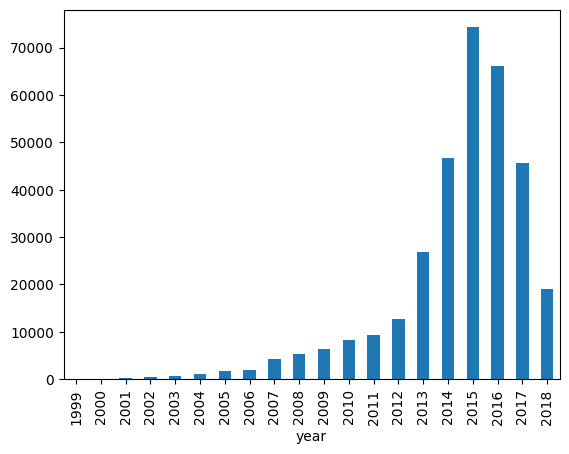

In [ ]:
#What was the best year for sales
df['year'] = pd.DatetimeIndex(df['timestamp']).year

df.groupby('year')['rating'].count().plot(kind='bar')

In [ ]:
df.groupby('year')['rating'].count()

year
1999        2
2000       77
2001      293
2002      371
2003      669
2004     1019
2005     1767
2006     1918
2007     4366
2008     5408
2009     6435
2010     8302
2011     9277
2012    12726
2013    26785
2014    46740
2015    74306
2016    66105
2017    45574
2018    18980
Name: rating, dtype: int64

In [ ]:
df.brand.info()

<class 'pandas.core.series.Series'>
Int64Index: 331120 entries, 14 to 1292953
Series name: brand
Non-Null Count   Dtype 
--------------   ----- 
331120 non-null  object
dtypes: object(1)
memory usage: 5.1+ MB


<Axes: xlabel='brand'>

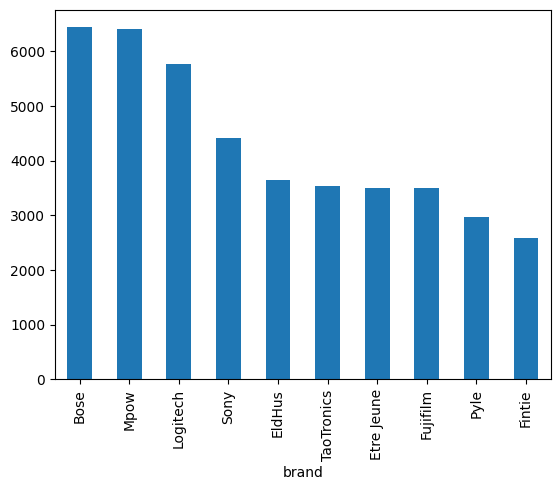

In [ ]:
#what brand sold the most in 2015

df_2015 = df[df['year'] == 2015]

df_2015.groupby('brand')['rating'].count().sort_values(ascending=False).head(10).plot(kind='bar')

<Axes: xlabel='brand'>

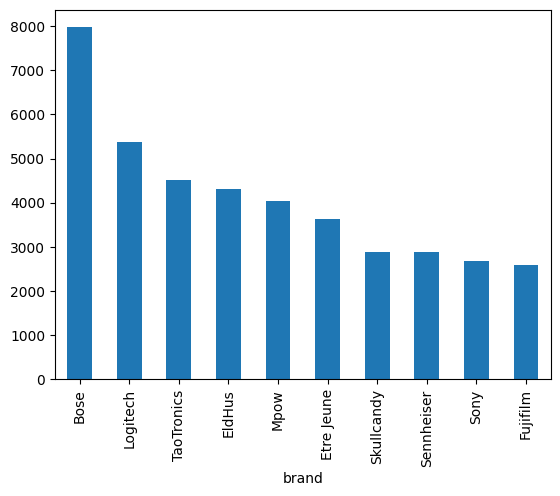

In [ ]:
#What product sold the most in 2016
df[df['year'] == 2016].groupby('brand')['rating'].count().sort_values(ascending=False).head(10).plot(kind='bar')

<Axes: xlabel='brand'>

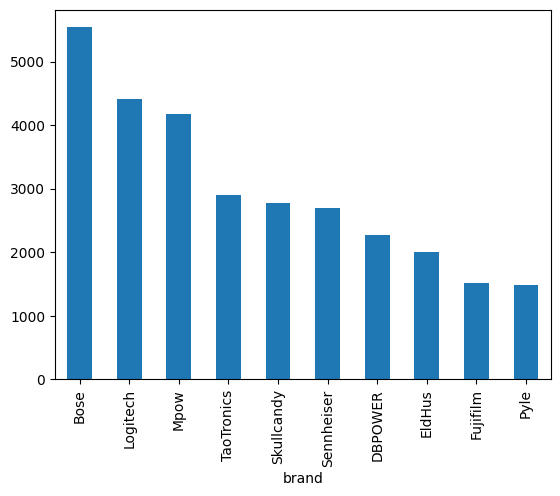

In [ ]:
#Products sold most in 2017
df[df['year'] == 2017].groupby('brand')['rating'].count().sort_values(ascending=False).head(10).plot(kind='bar')

<Axes: xlabel='brand'>

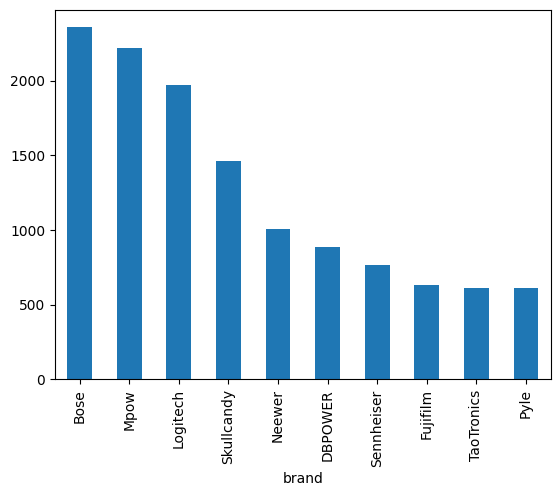

In [ ]:
df[df['year'] == 2018].groupby('brand')['rating'].count().sort_values(ascending=False).head(10).plot(kind='bar')

<Axes: xlabel='month'>

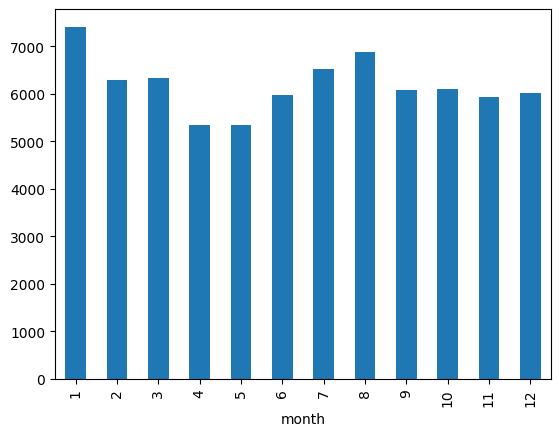

In [ ]:
#2015 was the best year, finding the best month in 2015
df['month'] = pd.DatetimeIndex(df['timestamp']).month

df[df['year'] == 2015].groupby('month')['rating'].count().plot(kind='bar')

<Axes: xlabel='brand'>

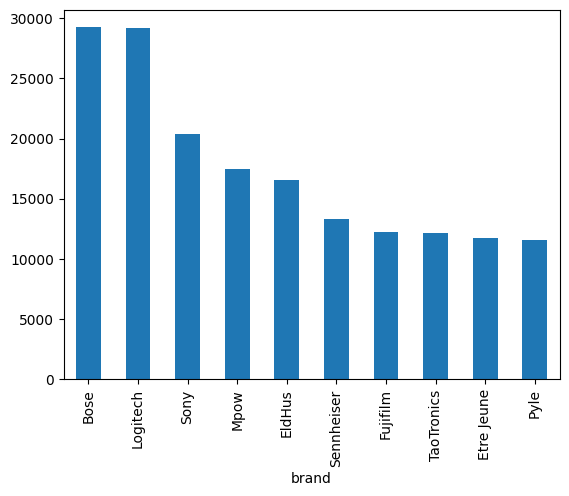

In [ ]:
#Most popular brand
df.groupby('brand')['rating'].count().sort_values(ascending=False).head(10).plot(kind='bar')

<Axes: xlabel='category'>

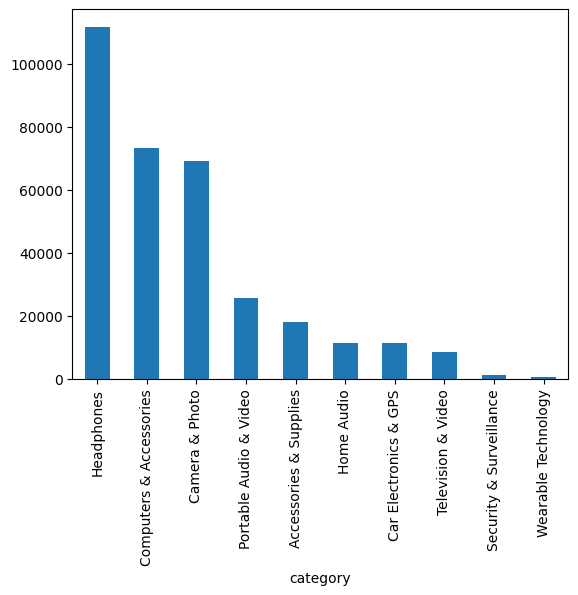

In [ ]:
#Most popular category

df.groupby('category')['rating'].count().sort_values(ascending=False).plot(kind='bar')

<Axes: xlabel='brand'>

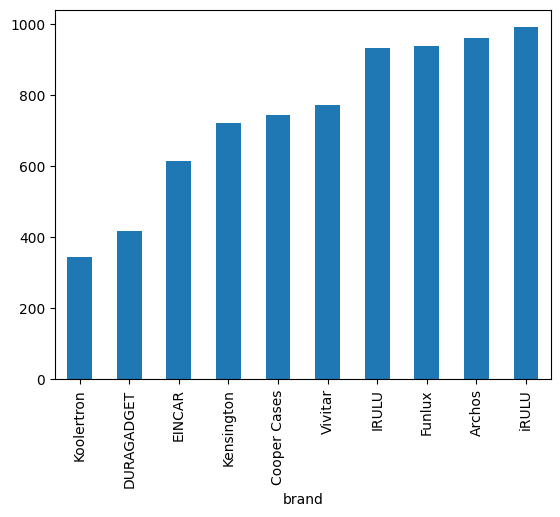

In [ ]:
#What product by brand name sold the least?

df.groupby('brand')['rating'].count().sort_values(ascending=True).head(10).plot(kind='bar')

<Axes: xlabel='category'>

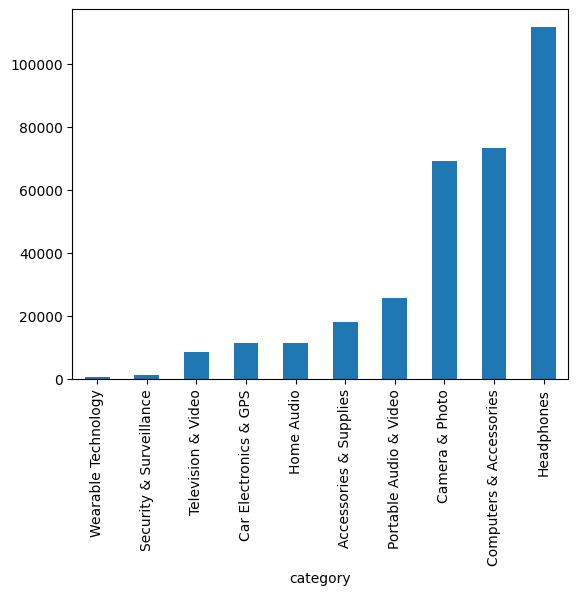

In [ ]:
# What product by category sold the least?

df.groupby('category')['rating'].count().sort_values(ascending=True).head(10).plot(kind='bar')

<Axes: ylabel='rating'>

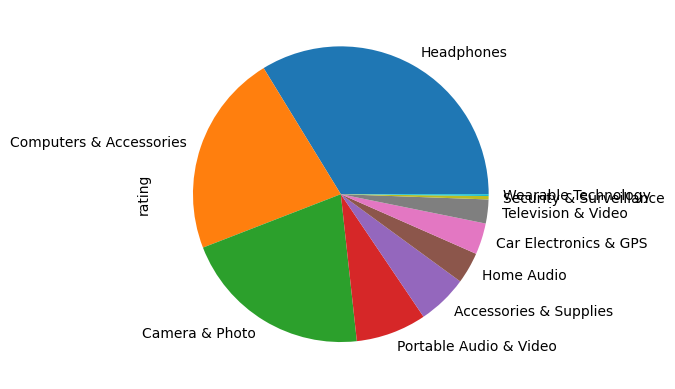

In [ ]:
#Category percentage sales
df.groupby('category')['rating'].count().sort_values(ascending=False).plot(kind='pie')

<Axes: ylabel='rating'>

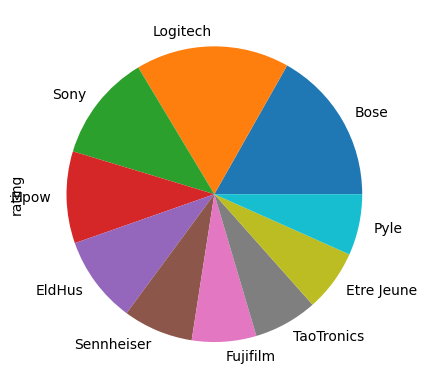

In [ ]:
#Brand percentage sales
df.groupby('brand')['rating'].count().sort_values(ascending=False).head(10).plot(kind='pie')


In [ ]:

# conclusion of our analysis

# We can see that the year 2015 had the best sales.

# The month of January had the best sales.

# We can see that the brands Bose and Logitech sold the most

# We can see that the category of Headphones sold the most.

# We can see that the brand name of EINCAR sold the least followed closely with DURAGADGET.

# We can see that the category of Security and Surveillance sold the least.